In [6]:
import sys
import os

sys.path.append(os.path.abspath('../src'))

import importlib

from sqlalchemy import create_engine
import getpass  # To get the password without showing the input
password = getpass.getpass()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hp_2015_2019s = pd.read_csv("csv_files/hp_2015_2019.csv")
energy = pd.read_csv("csv_files/global_energy_consumption.csv")

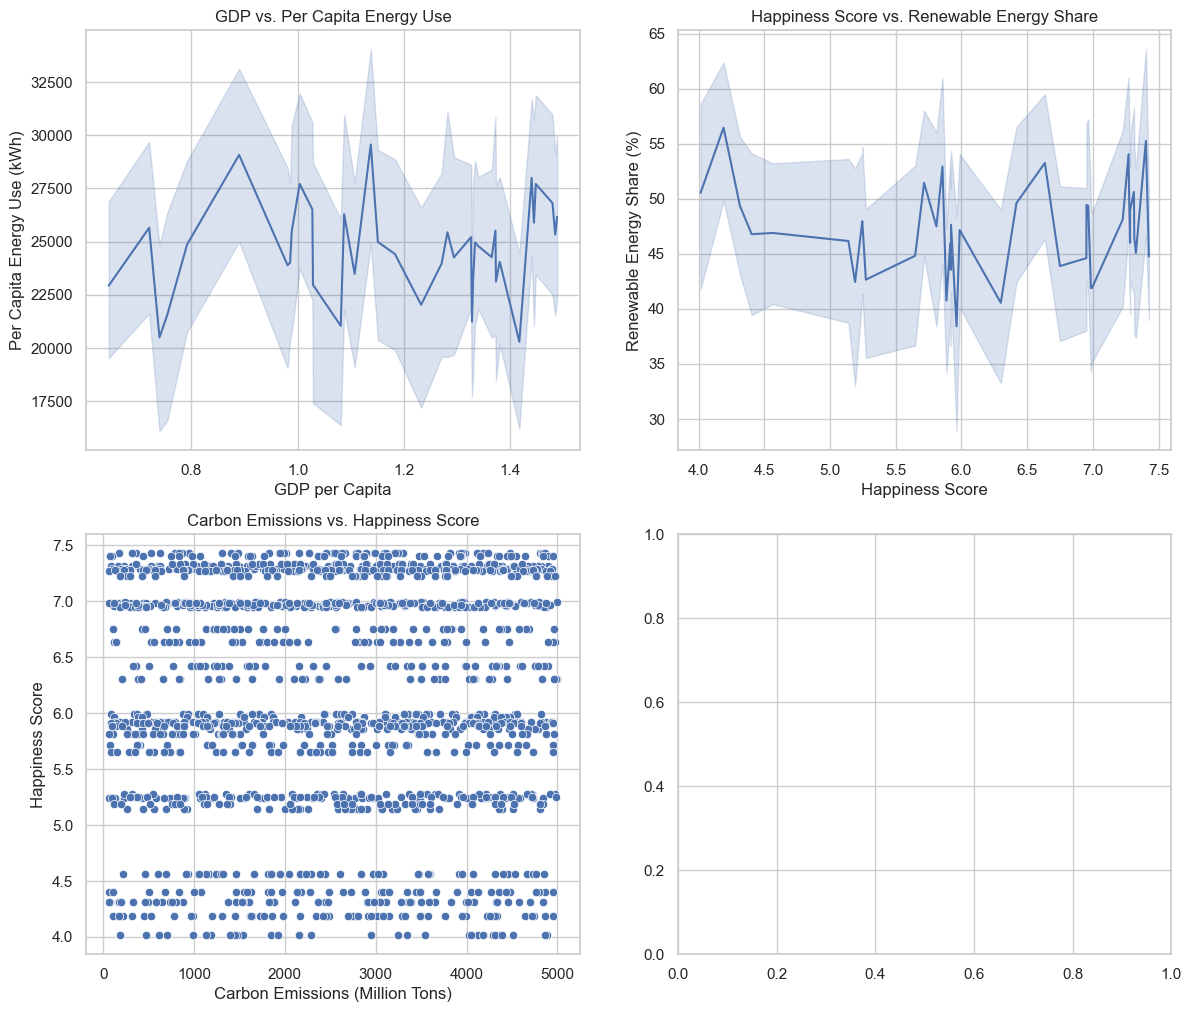

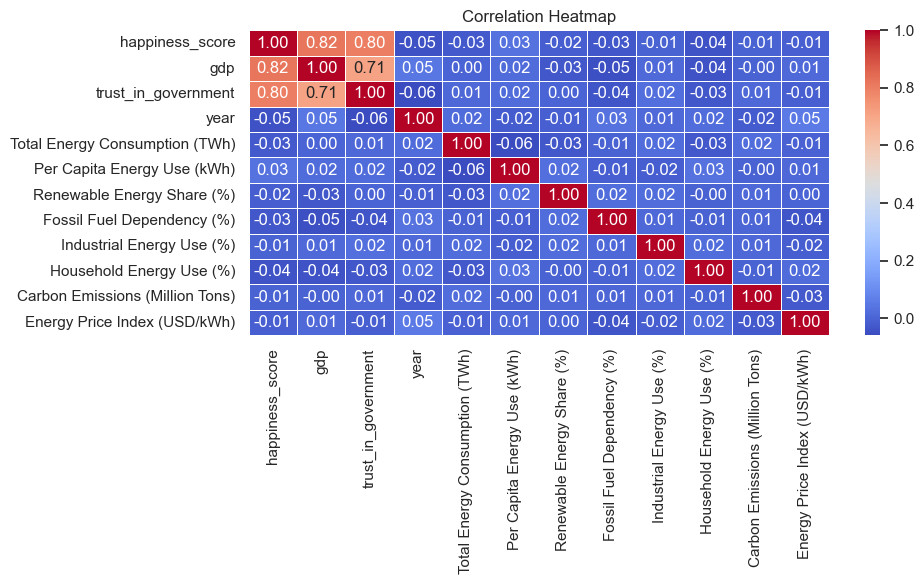

In [11]:

# Merge datasets on country and year
merged_df = pd.merge(hp_2015_2019s, energy, left_on=['country', 'year'], right_on=['Country', 'Year'], how='inner')

# Drop redundant columns
merged_df.drop(columns=['Country', 'Year'], inplace=True)

# Set plot style
sns.set(style="whitegrid")

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Line Plot: GDP vs. Per Capita Energy Use
sns.lineplot(x=merged_df["gdp"], y=merged_df["Per Capita Energy Use (kWh)"], ax=axes[0, 0])
axes[0, 0].set_title("GDP vs. Per Capita Energy Use")
axes[0, 0].set_xlabel("GDP per Capita")
axes[0, 0].set_ylabel("Per Capita Energy Use (kWh)")

# Line Plot: Happiness vs. Renewable Energy Share
sns.lineplot(x=merged_df["happiness_score"], y=merged_df["Renewable Energy Share (%)"], ax=axes[0, 1])
axes[0, 1].set_title("Happiness Score vs. Renewable Energy Share")
axes[0, 1].set_xlabel("Happiness Score")
axes[0, 1].set_ylabel("Renewable Energy Share (%)")

# Scatter Plot: Carbon Emissions vs. Happiness Score
sns.scatterplot(x=merged_df["Carbon Emissions (Million Tons)"], y=merged_df["happiness_score"], ax=axes[1, 0])
axes[1, 0].set_title("Carbon Emissions vs. Happiness Score")
axes[1, 0].set_xlabel("Carbon Emissions (Million Tons)")
axes[1, 0].set_ylabel("Happiness Score")

# Heatmap: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")

# Show plots
plt.tight_layout()
plt.show()